In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import platform

In [2]:
#다양한 OS에서 구현하기 위한 조건(제가 윈도우, 맥에서 코딩하기 때문에 넣게 되었습니다.)
if platform.system() == 'Darwin':
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux':
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False


df1 = pd.read_csv('covid.csv', encoding = 'cp949', index_col = 0)

area = df1["지역"].unique()
day = list(df1.index[:].unique())
p_data = []
temp = list(df1["확진자수"])

#지역별로 확진자수 나누기
while(temp):
    p_data.append(temp[:len(area)])
    del temp[:len(area)]
    
    
df2 = pd.DataFrame(index=day, columns=area,data=p_data)


원하는 지역을 입력해주세요 : 경기


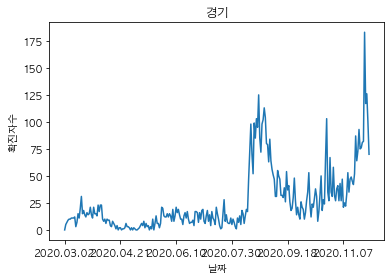

In [3]:
def P1():
    s_area = input("원하는 지역을 입력해주세요 : ")

    p1 = df2.columns.str.contains(s_area)

    p2 = df2.columns[p1]
    #일일 확진자수 구하기
    df3 = df2[p2] - df2[p2].shift()
    df3.iloc[0,0] = 0

    df3.plot(legend= None)
    
    #그래프 축이름 출력
    plt.title(s_area)
    plt.xlabel('날짜')
    plt.ylabel('확진자수')
    
    
    plt.show()
P1()

원하는 지역을 입력해주세요 : 충남


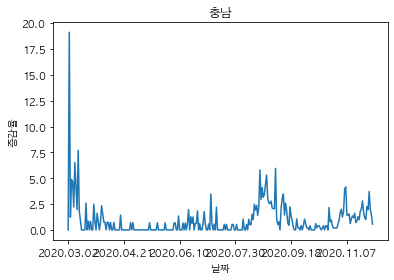

In [4]:
def P2():
    s_area = input("원하는 지역을 입력해주세요 : ")

    p1 = df2.columns.str.contains(s_area)

    p2 = df2.columns[p1]
    
    #일일 증감률
    df3 = (df2[p2] - df2[p2].shift())/df2[p2].shift() *100
    df3.iloc[0,0] = 0

    df3.plot(legend= None)
    
    plt.title(s_area)
    plt.xlabel('날짜')
    plt.ylabel('증감율')
    
    plt.show()

P2()

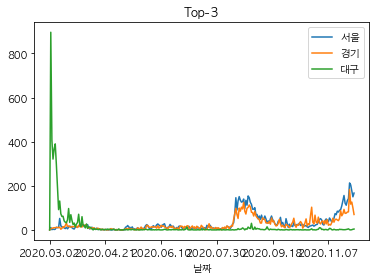

In [5]:
def P3():

    df3 = df2 - df2.shift()

    df3.iloc[0] = 0
    
    #일일 확진자수 평균 구하기
    sum_ = np.sum(df3, axis = 0)
    
    total = sum_.div(len(df3.index), axis = 0)
    
    result = total.sort_values(ascending=False)[0:3]
    
    
    df3[result.index].plot()
    plt.title("Top-3")
    plt.xlabel('날짜')
    
    
    plt.show()

P3()